In [73]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [74]:
df = pd.read_csv('marathon_results_2015.csv')

In [75]:
df = df.drop([2378])

In [76]:
index = [index for index in df['5K'].index if df['5K'][index]   == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['10K'].index if df['10K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['15K'].index if df['15K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['20K'].index if df['20K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['Half'].index if df['Half'][index]=='-']
df = df.drop(index[0:len(index)])
index = [index for index in df['25K'].index if df['25K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['30K'].index if df['30K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['35K'].index if df['35K'][index] == '-']
df = df.drop(index[0:len(index)])
index = [index for index in df['40K'].index if df['40K'][index] == '-']
df = df.drop(index[0:len(index)])

In [77]:
def time_to_seconds(time_string):
        x = time.strptime(time_string,'%H:%M:%S')
        time_tot = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
        return time_tot

In [78]:
df['TimeStamp_5K']  = df['5K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_10K'] = df['10K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_15K'] = df['15K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_20K'] = df['20K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_25K'] = df['25K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_30K'] = df['30K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_40K'] = df['40K'].apply(lambda x:  time_to_seconds(x))
df['TimeStamp_HF']  = df['Half'].apply(lambda x:  time_to_seconds(x))

In [79]:
df['Official Time'] = df['Official Time'].apply(lambda x: time_to_seconds(x))

In [80]:
df = df.drop(columns=['5K','10K','15K','20K','Half','25K','30K','35K','40K'])

In [81]:
df.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', 'Pace', 'Official Time', 'Overall', 'Gender',
       'Division', 'TimeStamp_5K', 'TimeStamp_10K', 'TimeStamp_15K',
       'TimeStamp_20K', 'TimeStamp_25K', 'TimeStamp_30K', 'TimeStamp_40K',
       'TimeStamp_HF'],
      dtype='object')

In [82]:
df = df.drop(columns=['Citizen','State','Name','Unnamed: 0','Unnamed: 9','City','Gender'])

In [83]:
df['M']= pd.get_dummies(df['M/F'])['M']
df['F']=pd.get_dummies(df['M/F'])['F']

In [84]:
df_country = pd.get_dummies(df.Country)

In [85]:
df = df.drop(columns=['M/F','Country'])

In [86]:
df = pd.concat([df,df_country],axis=1)

In [87]:
df['Pace'] = df['Pace'].apply(lambda x: time_to_seconds(x))

In [88]:
df = df.drop([x for x in df.Bib.index if df.Bib[x][0]=='F'])

In [89]:
df.Bib = pd.to_numeric(df.Bib)

In [90]:
X = df

In [19]:
X_train, X_test = train_test_split(X,test_size=0.3,random_state=42)

In [20]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train_trans = mms.transform(X_train)

In [21]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train_trans)
    Sum_of_squared_distances.append(km.inertia_)

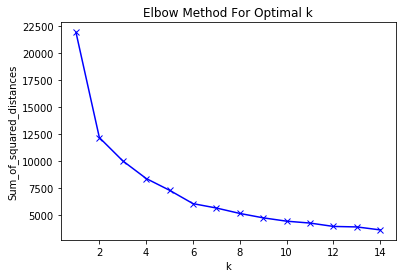

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
X_pca = PCA(94).fit_transform(X_train_trans)

In [118]:
XX = KMeans(n_clusters=5, random_state=42).fit_predict(X_train_trans)

In [119]:
y_pred = pd.DataFrame(pd.cut(df['Official Time'],5, labels=False, retbins=True, right=False))

In [120]:
y_pred1 = y_pred.iloc[0][:]
y_pred1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
26567    3.0
26568    3.0
26569    3.0
26570    3.0
26571    3.0
26572    3.0
26573    3.0
26574    3.0
26575    3.0
26576    3.0
26577    3.0
26579    3.0
26580    3.0
26581    3.0
26582    3.0
26583    3.0
26584    3.0
26585    3.0
26586    3.0
26587    3.0
26588    3.0
26589    3.0
26590    4.0
26591    4.0
26592    4.0
26593    4.0
26594    4.0
26595    4.0
26596    4.0
26597    4.0
Name: Official Time, Length: 26248, dtype: float64

In [121]:
XX = pd.DataFrame(XX,columns=['scores'])

In [122]:
df_final = pd.concat([df,XX],axis=1)

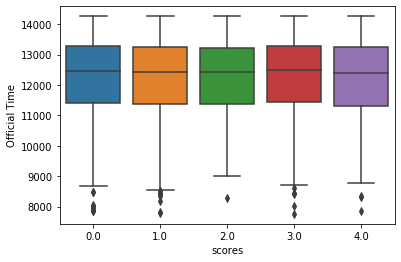

In [123]:
sns.boxplot(x='scores', y="Official Time", data=df_final)

C:\Users\Clyde\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Clyde\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


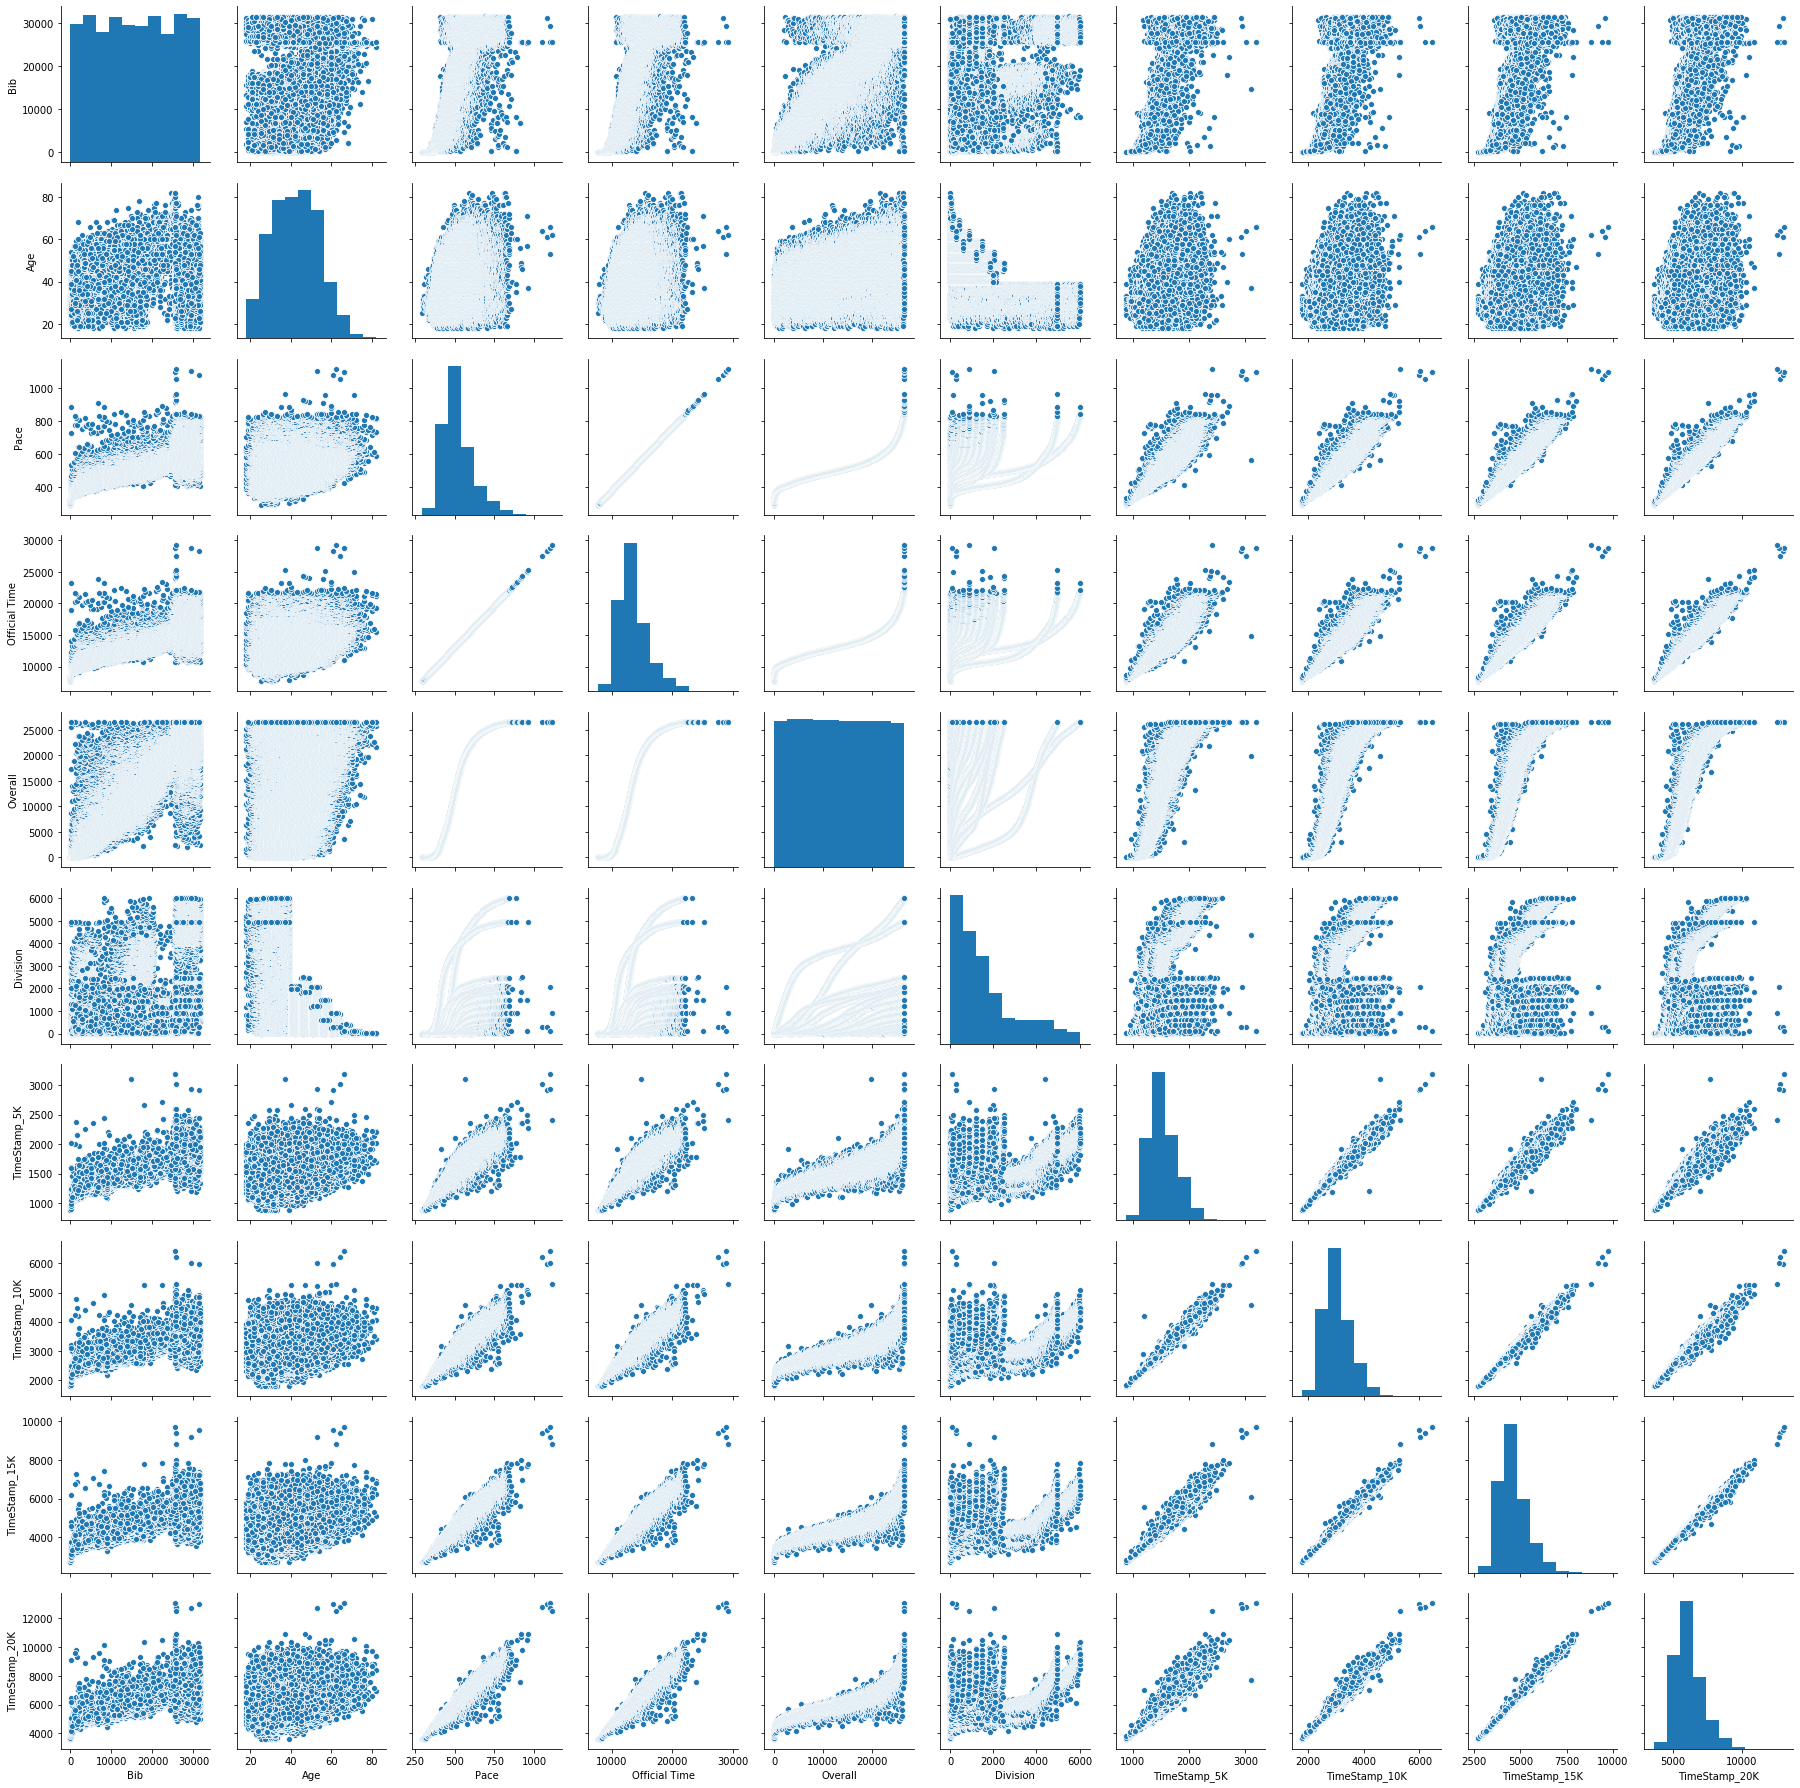

In [124]:
sns.pairplot(df_final[df_final.columns[0:10]])

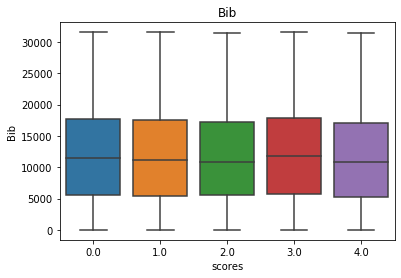

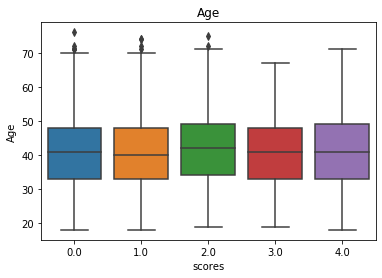

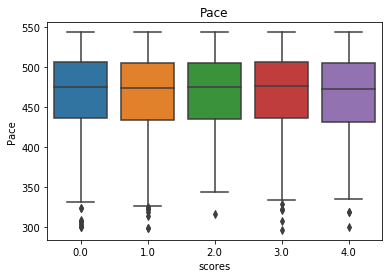

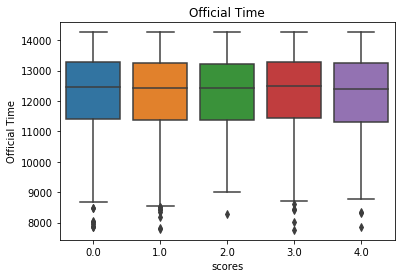

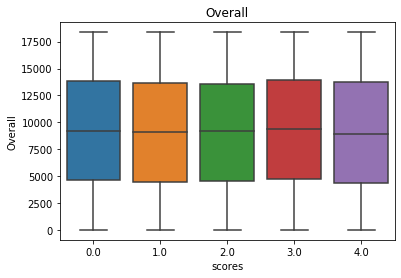

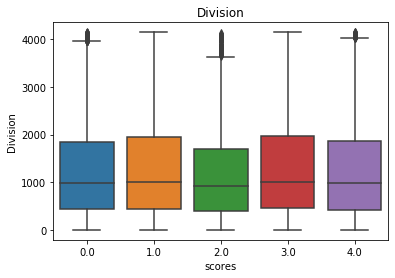

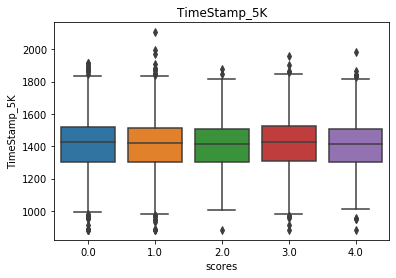

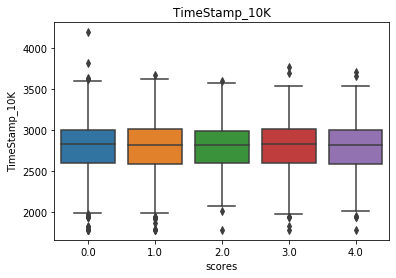

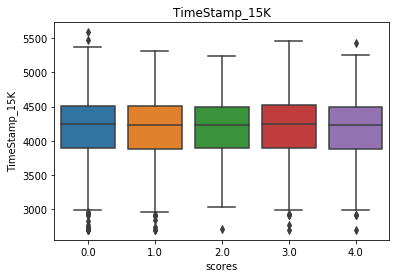

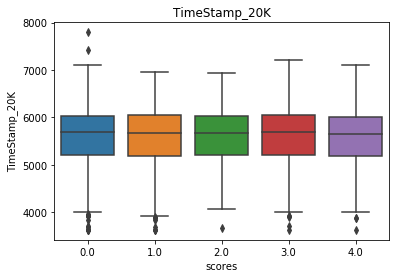

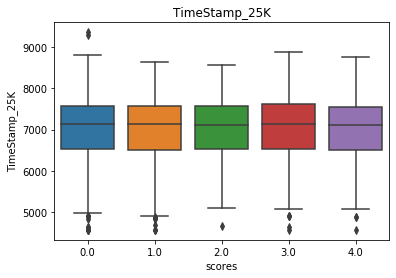

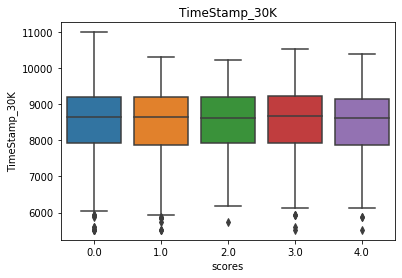

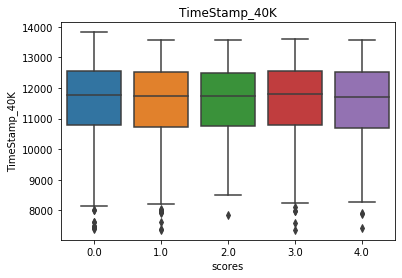

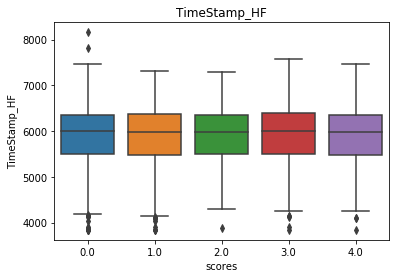

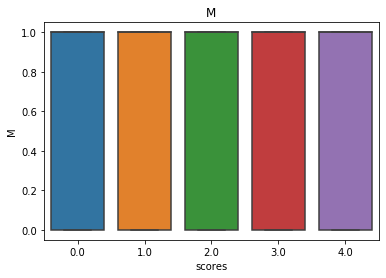

In [125]:
import seaborn as sns
for i in range(15):
    sns.boxplot(x="scores", y=df.columns[i], data=df_final)
    plt.title(df.columns[i])
    plt.show()


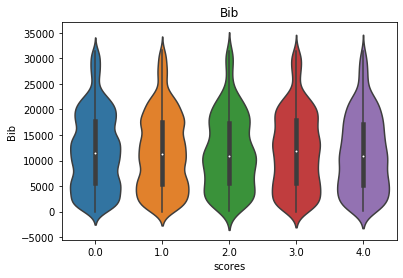

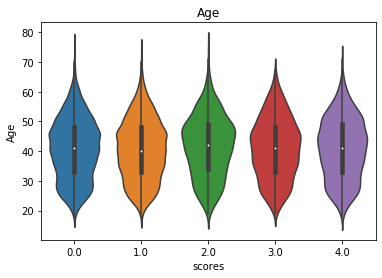

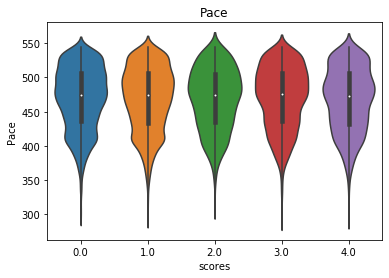

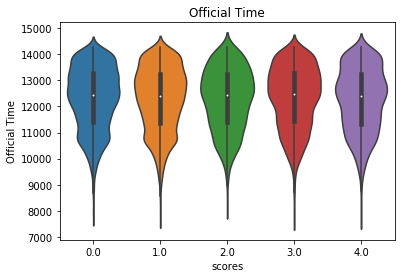

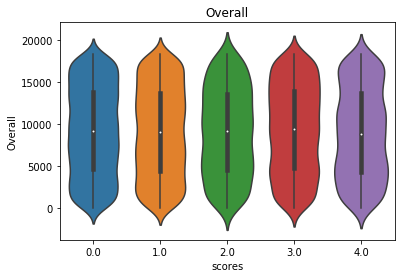

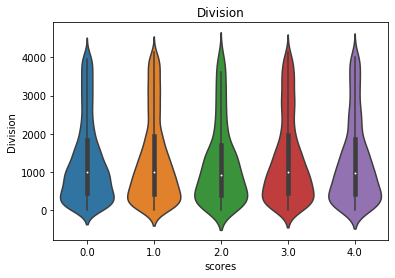

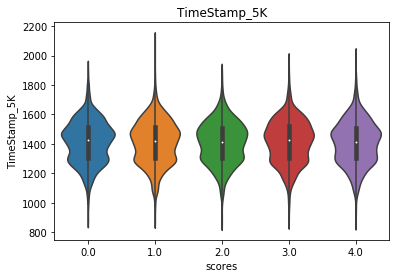

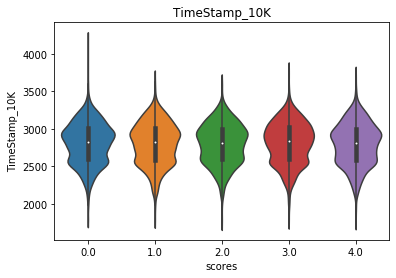

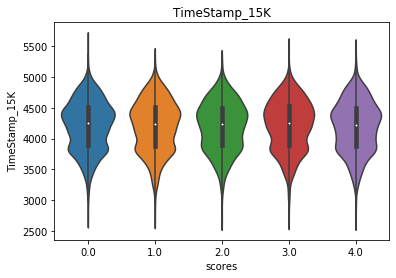

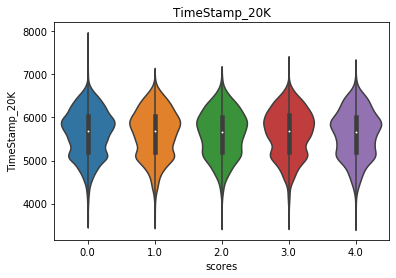

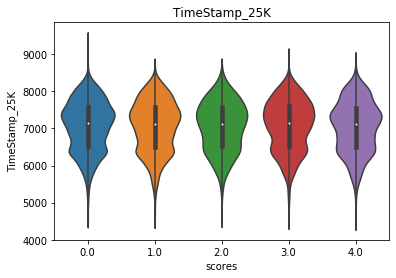

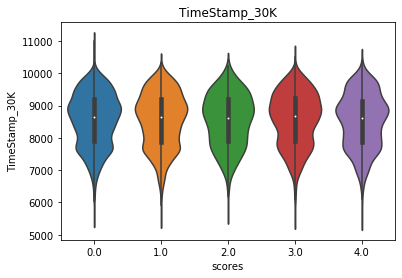

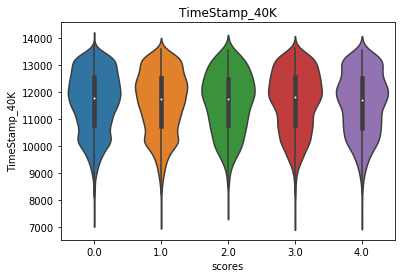

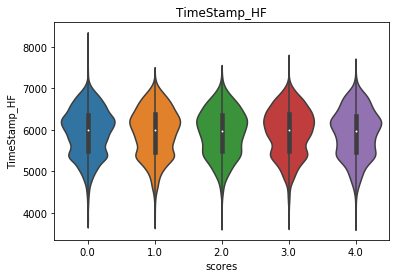

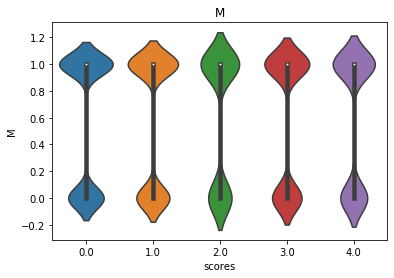

In [126]:
for i in range(15):
    sns.violinplot(x="scores", y=df.columns[i],data=df_final)
    plt.title(df.columns[i])
    plt.show()

In [127]:
df_means = pd.DataFrame()
df_std = pd.DataFrame()
for i in range(15):
    df_temp = df_final[[df_final.columns[i],'scores']].groupby(['scores']).mean()
    df_temp1 = df_final[[df_final.columns[i],'scores']].groupby(['scores']).std()
    df_means = pd.concat([df_means,df_temp],axis=1)
    df_std = pd.concat([df_std,df_temp1],axis=1)

In [128]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X_train,X_test]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.5398373089101333
0.5412758205802463


In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth  = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

In [32]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
X_pca = PCA(2).fit_transform(X_train)
ms.fit(X_pca)

MeanShift(bandwidth=7003.834748104239, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [33]:
labels = ms.labels_

In [34]:
np.unique(labels)

array([0, 1, 2], dtype=int64)

In [48]:
df_ms = pd.DataFrame(labels,columns=['scores'])
df_mean_shift = pd.concat([X_train,df_ms],axis=1)

In [52]:
dff = df = pd.read_csv('marathon_results_2015.csv')

In [57]:
len(dff.Country.unique())

79

In [63]:
y = dff.Country.replace(dff.Country.unique(),np.arange(0,79))
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], dtype=int64)

In [97]:
pd.cut(df['Official Time'],5, labels=False, retbins=True, right=False)

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 26567    3
 26568    3
 26569    3
 26570    3
 26571    3
 26572    3
 26573    3
 26574    3
 26575    3
 26576    3
 26577    3
 26579    3
 26580    3
 26581    3
 26582    3
 26583    3
 26584    3
 26585    3
 26586    3
 26587    3
 26588    3
 26589    3
 26590    4
 26591    4
 26592    4
 26593    4
 26594    4
 26595    4
 26596    4
 26597    4
 Name: Official Time, Length: 26248, dtype: int64,
 array([ 7757.   , 12037.8  , 16318.6  , 20599.4  , 24880.2  , 29182.404]))

In [91]:
df_final['TimeStamp_5K']

KeyError: 'TimeStamp_5K'

In [93]:
df.columns

Index(['Bib', 'Age', 'Pace', 'Official Time', 'Overall', 'Division',
       'TimeStamp_5K', 'TimeStamp_10K', 'TimeStamp_15K', 'TimeStamp_20K',
       'TimeStamp_25K', 'TimeStamp_30K', 'TimeStamp_40K', 'TimeStamp_HF', 'M',
       'F', 'AHO', 'AND', 'ARG', 'AUS', 'AUT', 'BAH', 'BEL', 'BER', 'BLR',
       'BRA', 'CAN', 'CAY', 'CHI', 'CHN', 'COL', 'CRC', 'CRO', 'CYP', 'CZE',
       'DEN', 'DOM', 'ECU', 'ESA', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GBR',
       'GER', 'GRE', 'GUA', 'HKG', 'INA', 'IND', 'IRL', 'ISL', 'ISR', 'ITA',
       'JAM', 'JPN', 'KEN', 'KOR', 'LAT', 'LIE', 'LTU', 'LUX', 'MAR', 'MAS',
       'MEX', 'NED', 'NOR', 'NZL', 'OMA', 'PAN', 'PER', 'PHI', 'POL', 'POR',
       'ROU', 'RSA', 'RUS', 'SIN', 'SLO', 'SUI', 'SVK', 'SWE', 'TPE', 'TRI',
       'TUR', 'UAE', 'UGA', 'UKR', 'URU', 'USA', 'VEN', 'VGB', 'VIE'],
      dtype='object')

In [ ]:
df